# Diffusion Constant Dose

Q = 5e+14 cm3
Rsheet = 8.322 ohm/sq


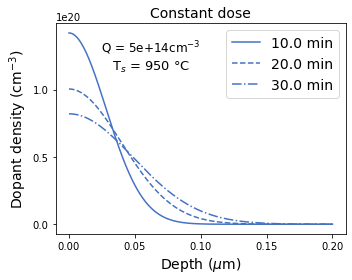

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

DATA_SIZE = 1000
kB = 8.617333e-5
q = 1.6021766e-19 #eV

#Material data
D0 = 10.5 #cm2·s-1
Ea = 3.69 #eV
mu = 1500 #cm2/V·s

Nwafer = 1e17 #cm-3

#Process data

T_list = np.array([950, 950, 950], dtype='double')  #ºC
time_list = np.array([600, 1200, 1800], dtype='double')  #s
Qload = 5e14 #cm-3

depth = 0.2e-4# cm

# Define intermediate profiles to plot
plot_profile = [1, 1, 1]


### Calculate profiles

# Temperatures in K 
T_list += 273.15  #K

nSteps = len(T_list)

# Make array with constant base doping profile
Nbase = np.zeros((DATA_SIZE,2))
Nbase[:,0] = np.linspace(0, depth, DATA_SIZE)
Nbase[:,1] = Nwafer

# Make array for profiles calculated
Nx = np.zeros((DATA_SIZE,2))
Nx[:,0] = np.linspace(0, depth, DATA_SIZE)
# Array with depths in microns for plotting
depth_um = np.zeros((DATA_SIZE))
depth_um = Nx[:,0]*1e4


linestyles = ('-', '--', '-.', ':')
    
fig = plt.figure(figsize=[5,4], tight_layout=True)
ax = fig.add_subplot()   
ax.set_title('Constant dose', size=14)
fig.text(0.43, 0.85, 'Q = '+ f"{Qload:.3}" + 'cm$^{-3}$',horizontalalignment='center', 
         verticalalignment='top', fontsize=12) 
fig.text(0.43, 0.78, 'T$_{s}$ = '+ f"{T_list[0]-273.15:.0f}" + ' °C',horizontalalignment='center', 
         verticalalignment='top', fontsize=13) 

ax.set_xlabel('Depth ($\mu$m)', size=14)
ax.set_ylabel('Dopant density (cm$^{-3}$)', size=14)
ax.ticklabel_format(axis='y', )
#ax.set_yscale('log')
#ax.set_ylim(Nwafer/10, Ns*1.01)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)



# 
# 

Rsheet = 1/(q*mu*Qload)
print("Q = "+f"{Qload:.3}"+" cm3")
print("Rsheet = "+f"{Rsheet:.3f}"+" ohm/sq")

for x in range(nSteps):
    dif_coef = D0*math.exp(-Ea/(kB*T_list[x]))
    dif_len = math.sqrt(4*dif_coef*time_list[x])
    
    
    for y in range(DATA_SIZE):
        Nx[y,1] = (2/math.sqrt(math.pi))*(Qload/dif_len)*math.exp(-(Nx[y,0]/dif_len)**2)    

    
    surface_N = (2/math.sqrt(math.pi))*(Qload/dif_len)
    x_junc = dif_len*math.sqrt(math.log(surface_N/Nwafer))
    
    
    
    if plot_profile[x]==1:
        trace, = ax.plot(depth_um, Nx[:,1], color='#4472C4',  linestyle=linestyles[x], label=str(time_list[x]/60) + ' min')  


    
ax.legend(fontsize=14)    

plt.savefig("fig_constantDose.png", dpi=300)